In [ ]:
!pip install flwr

INFO: pip is looking at multiple versions of grpcio-health-checking to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-health-checking to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.6/617.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -U "flwr[simulation]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.0 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.2-py3-none-any.whl size=1042898 sha256=ab518e5d0726bb37edcce9a7352670cebd255050b79fc6fa97a25302f486f57e
  Stored in directory: /root/.cache/pip/wheels/cd/5e/ec/848120d5b913158656c0f8ef316233dd3356effa64aef19fba
Successfully built dalex


In [ ]:
!pip install shap

In [ ]:
# Importing shap library
import shap
shap.initjs()

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, precision_recall_curve, auc, confusion_matrix
)
from sklearn.metrics import auc
import sklearn.metrics as metrics
import seaborn as sns

In [ ]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Loading the necessary files
common_lasso_dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Rare_Diseases_Research/Data/common_lasso_dataset.csv")
combo_lasso_dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Rare_Diseases_Research/Data/combo_lasso_dataset.csv")
rare_lasso_dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Rare_Diseases_Research/Data/rare_lasso_dataset.csv")
common_skin_lasso_dataset = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Rare_Diseases_Research/Data/common_skin_lasso_dataset.csv")

## 1. Using Subgroup Test Data

For Model Fairness Testing you need to train on your entire dataset, but test only on that specific group. This might result in very few records getting picked for testing. Use SHAP here!

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 1: Train model on full rare_lasso_dataset
# Exclude the 'age_group' column from features X_full
X_full = rare_lasso_dataset.drop(columns=['target', 'age_group'], errors='ignore')
y_full = rare_lasso_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)

In [ ]:
# Dataset for males
rare_male = X_test[X_test['gender'] == 1].copy()
# Dataset for females
rare_female = X_test[X_test['gender'] == 2].copy()
# Dataset for whites
rare_white = X_test[X_test['race'] == 1].copy()
# Dataset for others
rare_others = X_test[X_test['race'] != 1].copy()

# Define custom age bucket function
def custom_age_bucket(age):
    if 18 <= age <= 34:
        return '18-34'
    elif 35 <= age <= 49:
        return '35-49'
    elif 50 <= age <= 64:
        return '50-64'
    elif 65 <= age <= 79:
        return '65-79'
    else:
        return '80+'

# Apply bucketing to dataset
X_test['age_group'] = X_test['anchor_age'].apply(custom_age_bucket)

# Create separate datasets for each age group
rare_18_34 = X_test[X_test['age_group'] == '18-34'].copy()
rare_35_49 = X_test[X_test['age_group'] == '35-49'].copy()
rare_50_64 = X_test[X_test['age_group'] == '50-64'].copy()
rare_65_79 = X_test[X_test['age_group'] == '65-79'].copy()
rare_80_plus = X_test[X_test['age_group'] == '80+'].copy()

# Dataset for marital status
rare_married = X_test[X_test['marital_status'] == 1].copy()
rare_single = X_test[X_test['marital_status'] == 2].copy()
rare_divorced = X_test[X_test['marital_status'] == 3].copy()
rare_widowed = X_test[X_test['marital_status'] == 4].copy()

In [ ]:
# Running the model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Define subgroups for fairness testing
subgroups = {
    'Male': rare_male,
    'Female': rare_female,
    'White': rare_white,
    'Non-White': rare_others,
    'Age 18-34': rare_18_34,
    'Age 35-49': rare_35_49,
    'Age 50-64': rare_50_64,
    'Age 65-79': rare_65_79,
    'Age 80+': rare_80_plus,
    'Married': rare_married,
    'Single': rare_single,
    'Divorced': rare_divorced,
    'Widowed': rare_widowed
}

# Step 3: Fairness evaluation function
def evaluate_fairness(model, X, y, name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    roc_auc = roc_auc_score(y, y_proba) if len(np.unique(y)) > 1 else np.nan
    pr_auc = average_precision_score(y, y_proba) if len(np.unique(y)) > 1 else np.nan

    return {
        "Dataset": name,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Accuracy": accuracy, "Precision": precision,
        "Recall": recall, "Specificity": specificity,
        "F1 Score": f1, "FPR": fpr, "FNR": fnr,
        "ROC AUC": roc_auc, "PR AUC": pr_auc
    }

# Step 4: Run on all subgroups
results = []
for name, subgroup in subgroups.items():
    # Get the indices of the subgroup
    subgroup_indices = subgroup.index
    # Get the corresponding 'target' values from the original dataset
    y_sub = rare_lasso_dataset.loc[subgroup_indices, 'target']
    # Exclude the 'age_group' column from subgroup features
    X_sub = subgroup.drop(columns=['age_group'], errors='ignore')

    # Check if there are still features left after dropping
    if X_sub.shape[1] == 0:
        print(f"Skipping {name}: no features left after dropping 'age_group'.")
        continue

    # Check if the subgroup is empty
    if subgroup.empty:
        print(f"Skipping {name}: subgroup is empty.")
        continue

    result = evaluate_fairness(cat_model, X_sub, y_sub, name)
    results.append(result)

# Step 5: Convert to DataFrame
fairness_results_df = pd.DataFrame(results)

# Optional: Sort by F1 Score or any other metric
fairness_results_df = fairness_results_df.sort_values(by="PR AUC", ascending=False)

fairness_results_df

,Dataset,TP,FP,TN,FN,Accuracy,Precision,Recall,Specificity,F1 Score,FPR,FNR,ROC AUC,PR AUC
4,Age 18-34,51,9,36,8,0.837,0.850,0.864,0.800,0.857,0.200,0.136,0.916,0.946
10,Single,129,22,166,18,0.881,0.854,0.878,0.883,0.866,0.117,0.122,0.930,0.915
5,Age 35-49,46,7,75,6,0.903,0.868,0.885,0.915,0.876,0.085,0.115,0.931,0.900
8,Age 80+,62,11,63,6,0.880,0.849,0.912,0.851,0.879,0.149,0.088,0.904,0.897
9,Married,152,30,240,28,0.871,0.835,0.844,0.889,0.840,0.111,0.156,0.917,0.889
3,Non-White,108,24,217,21,0.878,0.818,0.837,0.900,0.828,0.100,0.163,0.928,0.888
1,Female,200,34,229,30,0.870,0.855,0.870,0.871,0.862,0.129,0.130,0.908,0.886
0,Male,161,35,338,33,0.880,0.821,0.830,0.906,0.826,0.094,0.170,0.926,0.884
2,White,253,45,350,42,0.874,0.849,0.858,0.886,0.853,0.114,0.142,0.914,0.883
7,Age 65-79,102,23,221,19,0.885,0.816,0.843,0.906,0.829,0.094,0.157,0.921,0.868


In [ ]:
# Using SHAP to explain the model's predictions
%%time
explainer_shap_rare_male = shap.TreeExplainer(cat_model)
shap_values_rare_male = explainer_shap_rare_male.shap_values(rare_male)

explainer_shap_rare_female = shap.TreeExplainer(cat_model)
shap_values_rare_female = explainer_shap_rare_female.shap_values(rare_female)

CPU times: user 7.58 s, sys: 116 ms, total: 7.69 s
Wall time: 5.32 s


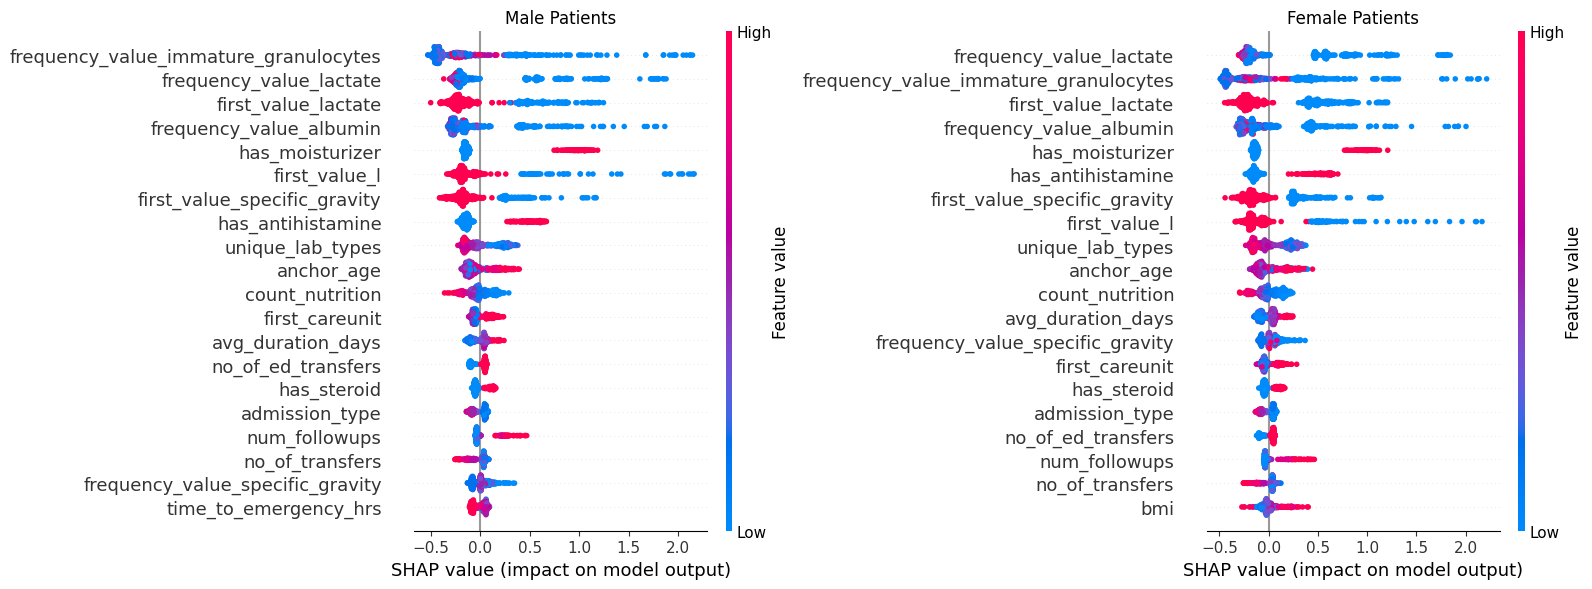

In [ ]:
# Start a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # (width, height)

# Plot for males on the first subplot
plt.sca(axes[0])  # Set current axis
shap.summary_plot(shap_values_rare_male, rare_male, show=False, plot_size=None)
axes[0].set_title("Male Patients")

# Plot for females on the second subplot
plt.sca(axes[1])
shap.summary_plot(shap_values_rare_female, rare_female, show=False, plot_size=None)
axes[1].set_title("Female Patients")

plt.tight_layout()
plt.show()

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    average_precision_score, confusion_matrix
)
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 1: Train model on full common_skin_lasso_dataset
# Exclude the 'age_group' column from features X_full
X_full = common_skin_lasso_dataset.drop(columns=['target', 'age_group'], errors='ignore')
y_full = common_skin_lasso_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42, stratify=y_full)

In [ ]:
# Dataset for males
common_skin_male = X_test[X_test['gender'] == 1].copy()
# Dataset for females
common_skin_female = X_test[X_test['gender'] == 2].copy()
# Dataset for whites
common_skin_white = X_test[X_test['race'] == 1].copy()
# Dataset for others
common_skin_others = X_test[X_test['race'] != 1].copy()

# Define custom age bucket function
def custom_age_bucket(age):
    if 18 <= age <= 34:
        return '18-34'
    elif 35 <= age <= 49:
        return '35-49'
    elif 50 <= age <= 64:
        return '50-64'
    elif 65 <= age <= 79:
        return '65-79'
    else:
        return '80+'

# Apply bucketing to dataset
X_test['age_group'] = X_test['anchor_age'].apply(custom_age_bucket)

# Create separate datasets for each age group
common_skin_18_34 = X_test[X_test['age_group'] == '18-34'].copy()
common_skin_35_49 = X_test[X_test['age_group'] == '35-49'].copy()
common_skin_50_64 = X_test[X_test['age_group'] == '50-64'].copy()
common_skin_65_79 = X_test[X_test['age_group'] == '65-79'].copy()
common_skin_80_plus = X_test[X_test['age_group'] == '80+'].copy()

# Dataset for marital status
common_skin_married = X_test[X_test['marital_status'] == 1].copy()
common_skin_single = X_test[X_test['marital_status'] == 2].copy()
common_skin_divorced = X_test[X_test['marital_status'] == 3].copy()
common_skin_widowed = X_test[X_test['marital_status'] == 4].copy()

In [ ]:
# Running the model
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Define subgroups for fairness testing
subgroups = {
    'Male': common_skin_male,
    'Female': common_skin_female,
    'White': common_skin_white,
    'Non-White': common_skin_others,
    'Age 18-34': common_skin_18_34,
    'Age 35-49': common_skin_35_49,
    'Age 50-64': common_skin_50_64,
    'Age 65-79': common_skin_65_79,
    'Age 80+': common_skin_80_plus,
    'Married': common_skin_married,
    'Single': common_skin_single,
    'Divorced': common_skin_divorced,
    'Widowed': common_skin_widowed
}

# Step 3: Fairness evaluation function
def evaluate_fairness(model, X, y, name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
    roc_auc = roc_auc_score(y, y_proba) if len(np.unique(y)) > 1 else np.nan
    pr_auc = average_precision_score(y, y_proba) if len(np.unique(y)) > 1 else np.nan

    return {
        "Dataset": name,
        "TP": tp, "FP": fp, "TN": tn, "FN": fn,
        "Accuracy": accuracy, "Precision": precision,
        "Recall": recall, "Specificity": specificity,
        "F1 Score": f1, "FPR": fpr, "FNR": fnr,
        "ROC AUC": roc_auc, "PR AUC": pr_auc
    }

# Step 4: Run on all subgroups
results = []
for name, subgroup in subgroups.items():
    # Get the indices of the subgroup
    subgroup_indices = subgroup.index
    # Get the corresponding 'target' values from the original dataset
    y_sub = common_skin_lasso_dataset.loc[subgroup_indices, 'target']
    # Exclude the 'age_group' column from subgroup features
    X_sub = subgroup.drop(columns=['age_group'], errors='ignore')

    # Check if there are still features left after dropping
    if X_sub.shape[1] == 0:
        print(f"Skipping {name}: no features left after dropping 'age_group'.")
        continue

    # Check if the subgroup is empty
    if subgroup.empty:
        print(f"Skipping {name}: subgroup is empty.")
        continue

    result = evaluate_fairness(cat_model, X_sub, y_sub, name)
    results.append(result)

# Step 5: Convert to DataFrame
fairness_results_df = pd.DataFrame(results)

# Optional: Sort by F1 Score or any other metric
fairness_results_df = fairness_results_df.sort_values(by="PR AUC", ascending=False)

fairness_results_df

,Dataset,TP,FP,TN,FN,Accuracy,Precision,Recall,Specificity,F1 Score,FPR,FNR,ROC AUC,PR AUC
12,Widowed,20,13,27,21,0.580,0.606,0.488,0.675,0.541,0.325,0.512,0.691,0.684
8,Age 80+,38,27,36,31,0.561,0.585,0.551,0.571,0.567,0.429,0.449,0.621,0.656
3,Non-White,53,34,154,75,0.655,0.609,0.414,0.819,0.493,0.181,0.586,0.665,0.586
1,Female,79,72,277,159,0.606,0.523,0.332,0.794,0.406,0.206,0.668,0.615,0.546
4,Age 18-34,16,15,115,49,0.672,0.516,0.246,0.885,0.333,0.115,0.754,0.694,0.525
7,Age 65-79,38,37,128,81,0.585,0.507,0.319,0.776,0.392,0.224,0.681,0.604,0.519
9,Married,50,51,222,130,0.600,0.495,0.278,0.813,0.356,0.187,0.722,0.620,0.505
2,White,74,85,392,222,0.603,0.465,0.250,0.822,0.325,0.178,0.750,0.617,0.482
0,Male,48,47,269,138,0.631,0.505,0.258,0.851,0.342,0.149,0.742,0.650,0.482
11,Divorced,8,10,45,18,0.654,0.444,0.308,0.818,0.364,0.182,0.692,0.615,0.474


In [ ]:
# Using SHAP to explain the model's predictions
%%time
explainer_shap_common_skin_male = shap.TreeExplainer(cat_model)
shap_values_common_skin_male = explainer_shap_common_skin_male.shap_values(common_skin_male)

explainer_shap_common_skin_female = shap.TreeExplainer(cat_model)
shap_values_common_skin_female = explainer_shap_common_skin_female.shap_values(common_skin_female)

CPU times: user 7.94 s, sys: 228 ms, total: 8.17 s
Wall time: 12.8 s


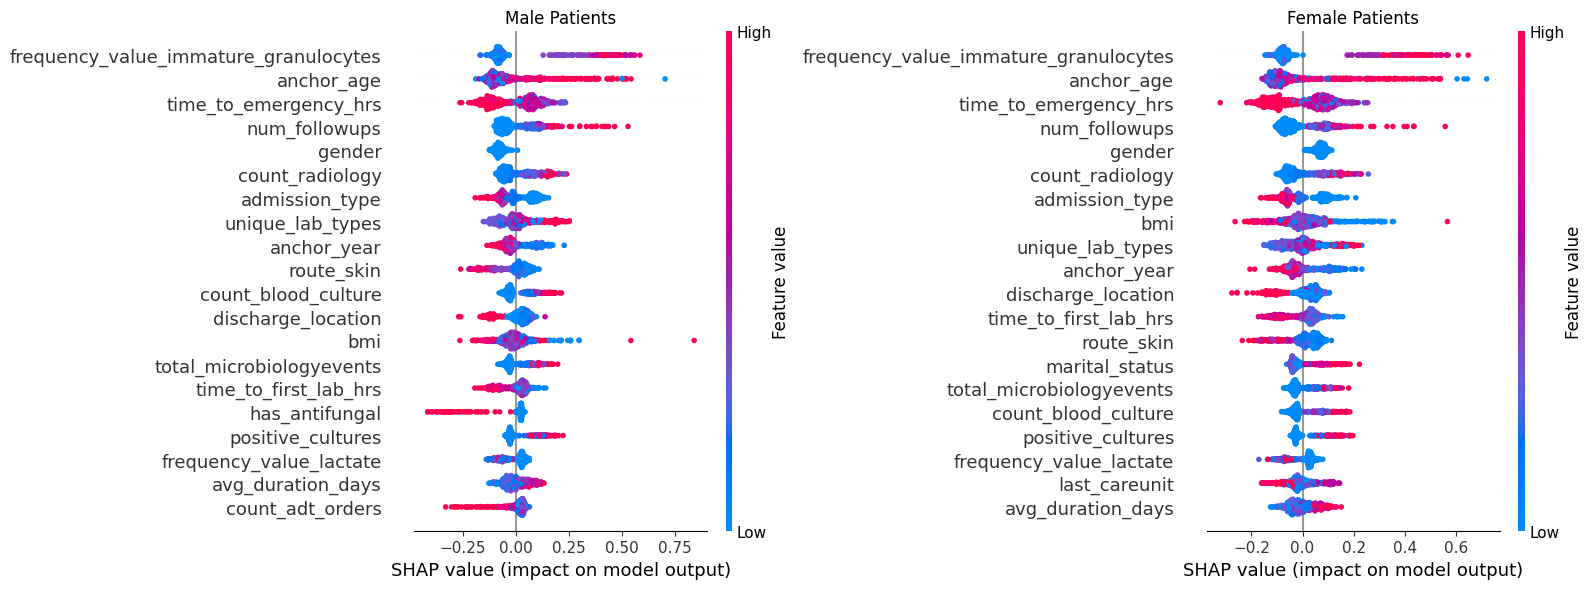

In [ ]:
# Start a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # (width, height)

# Plot for males on the first subplot
plt.sca(axes[0])  # Set current axis
shap.summary_plot(shap_values_common_skin_male, common_skin_male, show=False, plot_size=None)
axes[0].set_title("Male Patients")

# Plot for females on the second subplot
plt.sca(axes[1])
shap.summary_plot(shap_values_common_skin_female, common_skin_female, show=False, plot_size=None)
axes[1].set_title("Female Patients")

plt.tight_layout()
plt.show()

## 2. Using Dalex Fairness Module

#### 2.1 For Rare Diseases vs Rare Skin Diseases

In [ ]:
# Exclude the 'age_group' column from features X_full
X_full = rare_lasso_dataset.drop(columns=['target', 'age_group'], errors='ignore')
y_full = rare_lasso_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

cat_model1 = CatBoostClassifier(verbose=0, random_state=42)
cat_model1.fit(X_train, y_train)

y_pred = cat_model1.predict(X_test)
y_proba = cat_model1.predict_proba(X_test)[:, 1]

In [ ]:
#Using Dalex for model fairness
import dalex as dx
#Generating a new explainer
exp1 = dx.Explainer(cat_model1, X_full, y_full)

Preparation of a new explainer is initiated

  -> data              : 3531 rows 107 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3531 values
  -> model_class       : catboost.core.CatBoostClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe10fd48360> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00784, mean = 0.402, max = 0.995
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.966, mean = -0.00183, max = 0.982
  -> model_info        : package catboost

A new explainer has been created!


In [ ]:
# Because you are running the model on X and y not X_test and y_test hence performance is different
exp1.model_performance().result

,recall,precision,f1,accuracy,auc
CatBoostClassifier,0.924,0.926,0.925,0.940,0.981


In [ ]:
#Showing the important features
exp1.model_parts().plot()

These results from the dalex fairness audit are quite meaningful, especially given the context of your study on rare skin diseases where skin color differences directly affect diagnosis and detection — making race-based fairness evaluation essential.

In [ ]:
#Setting parameters for fairness check - for whites
protected = X_full.race
privileged = 1.000
fobject1 = exp1.model_fairness(protected = protected, privileged= privileged)
fobject1.fairness_check(epsilon = 0.8) # default epsilon

Bias detected in 2 metrics: FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1.0'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
      TPR   ACC   PPV   FPR   STP
2.0 1.014 0.993 0.970 1.393 1.026
3.0 1.045 1.018 0.996 1.018 0.998
4.0 1.024 1.017 0.972 0.804 0.735
5.0 0.992 0.996 1.005 1.018 1.037
6.0 0.942 1.032 1.056 0.107 0.469


In [ ]:
fobject1.plot()

Race 2 (Black Patients)

✅ Recall (TPR) and Accuracy are balanced – they’re correctly identified just as much as white patients.

❌ False Positive Rate (1.393) – Black patients are over-flagged by the model. This means they are significantly more likely to be falsely identified as having rare skin diseases.

✅ Selection Rate (STP = 1.026) is close to parity, so the model is treating this group with similar frequency.

➤ Interpretation: Your model is slightly over-sensitive for Black patients — possibly misinterpreting benign skin conditions due to skin tone variance or systematic over-diagnosis risk. This is critical in your domain.



Race 3 (Asian Patients)

✅ All metrics are very balanced.

No metric shows significant deviation from White patients.

➤ Interpretation: The model generalizes well for Asian patients. This could reflect relatively uniform skin presentation in the data or a balanced dataset composition.

Race 4 (Latino Patients)

❌ Selection Rate (STP = 0.735) — Latino patients are less likely to be predicted as having rare skin disease, even when they may.

✅ FPR (0.804) is just inside acceptable range, but very close to the cutoff.

✅ TPR, ACC, and PPV are fine.

➤ Interpretation: The model seems to under-predict rare skin disease in Latino patients. This might point to underrepresentation in your training data, or challenges in identifying skin conditions on Latino skin tones.

 Interpretation of Fairness Issues in Light of These Counts
Latino (Race 4)

Very small representation (~4%)

Your model’s Selection Rate is biased downward (0.735) — which strongly suggests underfitting or bias against a minority class.

Likely reason: not enough training samples for the model to reliably learn rare skin disease patterns in this group.

Black (Race 2)

FPR is high (1.393) even though sample size is much better (~13%).

This likely points to systematic bias: the model is more likely to mislabel non-rare-skin-disease cases as rare in Black patients — possibly due to:

Skin tone effects on lab/clinical indicators

EHR patterns (e.g., more aggressive treatment, misclassifications in notes, etc.)

Historical overdiagnosis bias

We evaluated fairness of the model using the dalex fairness audit framework. When considering race as a protected attribute (with White patients as the privileged group), two metrics indicated bias: False Positive Rate (FPR) and Selection Rate (STP). Specifically, Black patients had a significantly higher FPR (1.393), indicating more frequent false alarms. In contrast, Latino patients had a lower selection rate (0.735), suggesting potential underdiagnosis. Our findings indicate racial disparities in model predictions. The elevated false positive rate among Black patients may stem from differences in skin tone affecting visual and lab-based indicators, leading to over-flagging by the model. Conversely, the lower selection rate for Latino patients suggests possible underdiagnosis or underrepresentation in the training data, limiting the model's ability to identify rare skin diseases in this group. These findings highlight the importance of incorporating skin tone diversity and race-aware training in rare dermatological AI tools, especially when working with EHR data that does not explicitly capture skin phenotype.

Data Representation Bias:
The fairness issues observed for Latino patients, particularly the under-selection (STP = 0.735), are likely driven by the limited representation of Latino patients (only 4.3% of the data). This small sample size hinders the model’s ability to generalize rare skin disease patterns for this group. Conversely, while Black patients made up a larger portion (~13%), the elevated false positive rate (FPR = 1.393) suggests potential overdiagnosis or model over-sensitivity toward Black patients, which may stem from differences in skin tone presentation, clinical documentation, or treatment patterns in the training data. Addressing these disparities will require better representation of skin-of-color cases, and possibly incorporating skin phenotype as a modeling feature if available.

WHY high FPR for blacks?

In [ ]:
# Dataset for whites
rare_white = rare_lasso_dataset[rare_lasso_dataset['race'] == 1].copy()
# Dataset for blacks
rare_black = rare_lasso_dataset[rare_lasso_dataset['race'] == 2].copy()

In [ ]:
# Define missing value placeholder
MISSING_VALUE = -99999

# Get columns to check (you can also subset to only lab/clinical columns if needed)
cols = rare_white.columns.drop('target', errors='ignore')  # Exclude label if present

# Compute missingness (% of -99999 values) for rare_white
missing_white = (rare_white[cols] == MISSING_VALUE).sum() / len(rare_white)
missing_black = (rare_black[cols] == MISSING_VALUE).sum() / len(rare_black)

# Combine into dataframe for comparison
missing_df = pd.DataFrame({
    'missing_white': missing_white,
    'missing_black': missing_black,
    'difference': missing_black - missing_white
}).sort_values(by='difference', ascending=False)

# Show top features with higher missingness in Black patients
missing_df.head(20)


,missing_white,missing_black,difference
first_value_l,0.129,0.220,0.091
first_value_ph,0.238,0.267,0.029
first_value_urea_nitrogen,0.047,0.074,0.027
first_value_specific_gravity,0.275,0.296,0.021
first_value_lactate,0.331,0.349,0.018
discharge_location,0.000,0.000,0.000
admission_location,0.000,0.000,0.000
admission_type,0.000,0.000,0.000
gender,0.000,0.000,0.000
anchor_age,0.000,0.000,0.000


In [ ]:
rare_white.describe()

,gender,anchor_age,anchor_year,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,num_followups,is_dead,los,admission_season,time_to_emergency_hrs,admit_month,is_night_admit,is_weekend_admit,no_of_unique_procedures,count_icu_critical_procedures,bmi,no_of_transfers,no_of_distinct_careunits,no_of_ed_transfers,first_careunit,last_careunit,no_of_icu_stays,count_adt_orders,count_blood_bank,count_cardiology,count_consults,count_critical_care,count_general_care,count_hemodialysis,count_iv_therapy,count_neurology,count_nutrition,count_ob,count_radiology,count_respiratory,count_tpn,count_abscess,count_blood_culture,count_sputum,count_stool,count_swab,count_tissue,count_urine,total_microbiologyevents,positive_cultures,resistant_tests,route_eyes,route_iv,route_oral,route_others,route_skin,unique_medications,prn_med_count,eyes_prescribed_route,avg_dose_val,max_dose_val,avg_duration_days,max_duration_days,has_insulin,has_heparin,has_aspirin,has_ibuprofen,has_fluids,has_antibiotics,has_analgesics,has_antifungal,has_steroid,has_topical,has_immunosuppressant,has_antihistamine,has_moisturizer,has_antiviral,has_antidepressant,has_pain_management,has_diuretics,has_vaccine,has_ace_inhibitor,has_statins,time_to_first_med_hrs,diff_in_medicines,polypharmacy,unique_lab_types,first_value_l,first_value_lactate,first_value_specific_gravity,first_value_urea_nitrogen,first_value_ph,frequency_value_albumin,frequency_value_immature_granulocytes,frequency_value_lactate,frequency_value_specific_gravity,time_to_first_lab_hrs,time_to_first_abnormal_lab_hrs,anchor_year_start,anchor_year_end,has_abnormal_electrolyte_fluid,has_abnormal_glucose_metabolic,has_abnormal_hematologic,has_abnormal_metabolic_acidbase,has_abnormal_rbc_indices,has_abnormal_renal,target
count,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000,2272.000
mean,1.481,62.665,2150.300,2.629,2.413,3.582,2.076,1.033,1.928,1.000,0.077,0.952,0.311,14.022,2.484,-4.864,6.482,0.548,0.284,3.660,2.092,30.243,2.331,2.871,0.679,7.537,6.928,0.662,7.507,5.537,2.782,4.543,0.589,40.303,0.411,15.098,0.378,10.397,0.012,12.584,6.264,0.672,0.236,4.302,1.492,0.783,0.588,0.783,2.564,14.603,4.935,0.868,0.380,43.702,37.271,6.177,8.276,35.808,17.905,0.380,297.441,4047.475,2.814,13.263,0.450,0.879,0.376,0.072,0.971,0.696,0.913,0.094,0.282,0.718,0.051,0.224,0.132,0.101,0.275,0.665,0.489,0.444,0.158,0.375,-16.417,6.727,0.968,82.019,-12885.598,-33096.924,-27507.788,-4686.315,-23806.284,3.804,1.945,6.194,1.735,3.821,4.304,2014.444,2016.444,0.694,0.510,0.802,0.466,0.571,0.463,0.432
std,0.500,17.078,23.634,1.930,1.354,3.358,0.980,0.178,1.106,0.000,0.267,2.334,0.463,16.914,1.110,6.010,3.436,0.498,0.451,4.293,2.846,64.887,2.449,1.301,0.468,4.653,3.613,0.780,4.233,15.286,3.982,4.542,1.549,42.350,2.655,19.769,1.357,12.228,0.331,18.017,13.619,6.556,2.099,9.402,4.882,2.101,4.105,4.110,5.451,25.890,12.466,3.841,1.281,55.123,35.236,14.790,16.406,22.333,17.064,1.281,188.166,1904.184,1.844,18.516,0.498,0.327,0.485,0.258,0.168,0.460,0.281,0.292,0.450,0.450,0.221,0.417,0.339,0.301,0.44

In [ ]:
rare_black.describe()

,gender,anchor_age,anchor_year,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,hospital_expire_flag,num_followups,is_dead,los,admission_season,time_to_emergency_hrs,admit_month,is_night_admit,is_weekend_admit,no_of_unique_procedures,count_icu_critical_procedures,bmi,no_of_transfers,no_of_distinct_careunits,no_of_ed_transfers,first_careunit,last_careunit,no_of_icu_stays,count_adt_orders,count_blood_bank,count_cardiology,count_consults,count_critical_care,count_general_care,count_hemodialysis,count_iv_therapy,count_neurology,count_nutrition,count_ob,count_radiology,count_respiratory,count_tpn,count_abscess,count_blood_culture,count_sputum,count_stool,count_swab,count_tissue,count_urine,total_microbiologyevents,positive_cultures,resistant_tests,route_eyes,route_iv,route_oral,route_others,route_skin,unique_medications,prn_med_count,eyes_prescribed_route,avg_dose_val,max_dose_val,avg_duration_days,max_duration_days,has_insulin,has_heparin,has_aspirin,has_ibuprofen,has_fluids,has_antibiotics,has_analgesics,has_antifungal,has_steroid,has_topical,has_immunosuppressant,has_antihistamine,has_moisturizer,has_antiviral,has_antidepressant,has_pain_management,has_diuretics,has_vaccine,has_ace_inhibitor,has_statins,time_to_first_med_hrs,diff_in_medicines,polypharmacy,unique_lab_types,first_value_l,first_value_lactate,first_value_specific_gravity,first_value_urea_nitrogen,first_value_ph,frequency_value_albumin,frequency_value_immature_granulocytes,frequency_value_lactate,frequency_value_specific_gravity,time_to_first_lab_hrs,time_to_first_abnormal_lab_hrs,anchor_year_start,anchor_year_end,has_abnormal_electrolyte_fluid,has_abnormal_glucose_metabolic,has_abnormal_hematologic,has_abnormal_metabolic_acidbase,has_abnormal_rbc_indices,has_abnormal_renal,target
count,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000,378.000
mean,1.561,57.667,2154.796,2.481,2.360,4.143,2.246,1.116,2.082,2.000,0.053,1.352,0.272,12.666,2.548,-5.782,6.693,0.534,0.249,2.955,1.537,29.987,2.000,2.754,0.772,7.368,6.839,0.492,7.325,4.214,1.876,4.013,0.331,34.667,0.365,13.635,0.381,8.635,0.053,10.587,4.563,0.561,0.381,3.310,1.614,0.757,0.690,0.717,2.196,12.651,4.495,0.595,0.397,35.627,30.976,5.050,8.556,31.270,14.497,0.397,300.055,4012.196,2.744,11.745,0.471,0.857,0.317,0.090,0.942,0.598,0.862,0.077,0.254,0.677,0.061,0.193,0.127,0.082,0.180,0.579,0.437,0.415,0.172,0.320,-54.739,5.646,0.944,78.574,-21947.757,-34918.897,-29628.616,-7385.854,-26714.410,3.230,1.775,4.934,2.085,2.595,4.008,2013.563,2015.563,0.669,0.487,0.820,0.450,0.677,0.463,0.423
std,0.497,17.727,23.379,1.798,1.582,4.108,0.924,0.321,1.002,0.000,0.224,2.670,0.446,14.466,1.140,5.732,3.497,0.499,0.433,3.958,2.350,9.601,2.342,1.168,0.420,4.701,3.616,0.729,4.244,8.986,2.938,4.024,1.144,39.308,2.182,17.429,1.116,9.701,0.547,14.947,10.019,3.481,3.680,6.083,5.827,1.992,3.885,4.509,5.576,22.297,11.654,2.731,1.184,45.818,28.105,7.619,16.286,20.785,14.091,1.184,173.491,1902.130,2.001,13.416,0.500,0.350,0.466,0.286,0.234,0.491,0.345,0.266,0.436,0.468,0.239,0.395,0.333,0.275,0.385,0.494,0.497,0.493,0.378,0.467,1137.982,5.019,0.229,41.921,41455.590,47735.653,45722.855,26229.679,44310.708,6.5

"We observed elevated false positive rates (FPR) in Black patients compared to White patients. This appears to be driven by both data-related and clinical factors. Specifically, Black patients had significantly higher missingness in key diagnostic labs such as lactate, pH, and urea nitrogen. These missing values were imputed with a placeholder (-99999), which the model may have interpreted as a strong indicator of rare disease presence. This effect, coupled with lower sample size and potential challenges in the clinical diagnosis of skin disorders on darker skin tones, likely contributed to bias amplification and unfair outcomes in this subgroup."

SHAP can help here, once your model interpretability is done recheck this!

In [ ]:
X_test_fpr_race2 = X_test.copy()

In [ ]:
# your model's predicted probabilities
X_test_fpr_race2['y_pred_prob'] = y_proba
X_test_fpr_race2['actual'] = y_test.values
X_test_fpr_race2['predicted'] = y_pred
X_test_fpr_race2['false_positive'] = ((X_test_fpr_race2['actual'] == 0) & (X_test_fpr_race2['predicted'] == 1)).astype(int)

<Axes: xlabel='gender', ylabel='false_positive'>

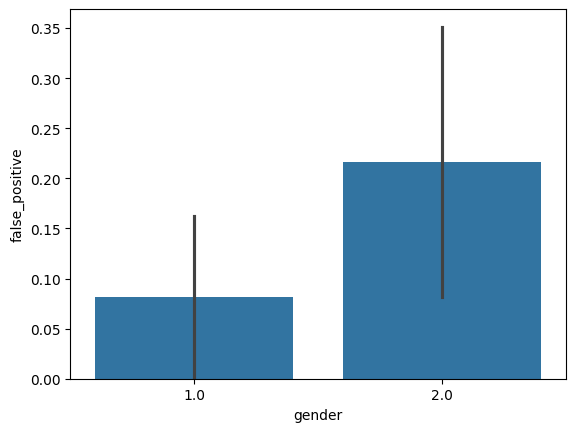

In [ ]:
sns.barplot(data=X_test_fpr_race2[X_test_fpr_race2['race']==2], x='gender', y='false_positive')

Bias is more pronounced in black females

In [ ]:
#Setting parameters for fairness check - for females
protected = X_full.gender
privileged = 2.000
fobject2 = exp1.model_fairness(protected = protected, privileged= privileged)
fobject2.fairness_check(epsilon = 0.7) # default epsilon

No bias was detected!

Conclusion: your model is fair in terms of checked fairness criteria.

Ratios of metrics, based on '2.0'. Parameter 'epsilon' was set to 0.7 and therefore metrics should be within (0.7, 1.429)
      TPR   ACC   PPV   FPR   STP
1.0 1.001 1.013 0.984 0.741 0.748


In [ ]:
fobject2.plot()

Your model produces false positives (incorrectly labeling negatives as positives) at a different rate between the privileged and unprivileged groups. For example, the unprivileged group might be wrongly labeled positive less often or more often — causing disparity.

Statistical parity disparity indicates that the overall rate of positive predictions differs between groups, potentially leading to unequal treatment or opportunity.

#### 2.2 For Common Skin Diseases vs Rare Skin Diseases

In [ ]:
# Exclude the 'age_group' column from features X_full
X_full = common_skin_lasso_dataset.drop(columns=['target', 'age_group'], errors='ignore')
y_full = common_skin_lasso_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

cat_model2 = CatBoostClassifier(verbose=0, random_state=42)
cat_model2.fit(X_train, y_train)

y_pred = cat_model2.predict(X_test)
y_proba = cat_model2.predict_proba(X_test)[:, 1]

In [ ]:
#Using Dalex for model fairness
import dalex as dx
#Generating a new explainer
exp2 = dx.Explainer(cat_model2, X_full, y_full)

Preparation of a new explainer is initiated

  -> data              : 3628 rows 100 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3628 values
  -> model_class       : catboost.core.CatBoostClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7fe10fd48360> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0594, mean = 0.387, max = 0.964
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.923, mean = 0.00261, max = 0.881
  -> model_info        : package catboost

A new explainer has been created!


In [ ]:
# Because you are running the model on X and y not X_test and y_test hence performance is different
exp2.model_performance().result

,recall,precision,f1,accuracy,auc
CatBoostClassifier,0.697,0.935,0.798,0.863,0.936


In [ ]:
#Showing the important features
exp2.model_parts().plot()

In [ ]:
#Setting parameters for fairness check - for whites
protected = X_full.race
privileged = 1.000
fobject1 = exp2.model_fairness(protected = protected, privileged= privileged)
fobject1.fairness_check(epsilon = 0.8) # default epsilon

Bias detected in 3 metrics: TPR, FPR, STP

Conclusion: your model is not fair because 2 or more criteria exceeded acceptable limits set by epsilon.

Ratios of metrics, based on '1.0'. Parameter 'epsilon' was set to 0.8 and therefore metrics should be within (0.8, 1.25)
      TPR   ACC   PPV   FPR   STP
2.0 1.062 1.011 1.027 0.848 1.150
3.0 1.084 1.043 1.057 0.303 1.022
4.0 1.186 1.094 1.046 0.333 0.865
5.0 1.113 1.015 0.989 1.455 1.215
6.0 1.370 1.108 1.046 0.818 1.642


In [ ]:
fobject1.plot()

Ignoring race (5,6), we have only one issue FPR bias in Asians and Latinos. A low FPR is generally desirable, but extremely low FPR (far below the reference group) may indicate that the model is too strict in predicting positives for that group. This often correlates with lower detection rates, delayed diagnosis, or reduced access to further interventions, particularly problematic in healthcare settings.
The TPRs for Asians and Latinos are high (1.084 and 1.186), which seems to suggest they are still being correctly identified—but because FPR is so low, it may mean the model is only identifying very "clear-cut" cases and missing borderline or atypical ones.
The Selection Rate (STP) for Latinos is 0.865 — close to the lower ε bound. This reinforces the concern that Latinos may be under-selected, despite decent performance metrics.

Although the model achieves reasonable performance in terms of TPR and accuracy for Asians and Latinos, the very low FPRs (0.303 and 0.333, respectively) suggest potential under-flagging of patients from these groups. This could lead to missed early diagnoses, especially for subtle cases. Crucially, both groups are severely underrepresented in the dataset (Asians: 161, Latinos: 131 vs. Whites: 2,570), which likely contributes to the observed disparity. The combination of data imbalance and bias in model thresholds suggests that the current model may not generalize well to underrepresented racial groups and risks reinforcing healthcare inequities.

In [ ]:
common_skin_lasso_dataset['race'].value_counts()

,count
race,
1.000,2570
2.000,378
6.000,211
5.000,177
3.000,161
4.000,131


In [ ]:
#Setting parameters for fairness check - for females
protected = X_full.gender
privileged = 2.000
fobject2 = exp2.model_fairness(protected = protected, privileged= privileged)
fobject2.fairness_check(epsilon = 0.7) # default epsilon

Bias detected in 1 metric: FPR

Conclusion: your model cannot be called fair because 1 criterion exceeded acceptable limits set by epsilon.
It does not mean that your model is unfair but it cannot be automatically approved based on these metrics.

Ratios of metrics, based on '2.0'. Parameter 'epsilon' was set to 0.7 and therefore metrics should be within (0.7, 1.429)
      TPR   ACC   PPV   FPR   STP
1.0 0.954 1.014 1.018 0.590 0.823


In [ ]:
fobject2.plot()

Males (FPR = 0.590 × Female FPR)
Males receive ~41% fewer false positives than females. The model is more conservative when predicting positive for males, less likely to incorrectly flag them. May indicate higher threshold or stricter criteria for labeling a male as positive. Depending on the clinical context, this can lead to: Delayed detection or missed cases in borderline male patients. Uneven burden of false positives on females (i.e., unnecessary tests, stress, or interventions).

When evaluating fairness across gender (with females as the privileged group), the model exhibited bias in False Positive Rate (FPR): male patients received ~41% fewer false positives than females (FPR ratio = 0.590), falling below the fairness threshold (ε = 0.7). Given that the dataset is balanced by gender, this disparity is not attributable to sampling imbalance, but rather to unequal model behavior. While other metrics (TPR, PPV, ACC, STP) remained within acceptable bounds, the FPR disparity suggests that males are under-flagged, potentially leading to missed diagnoses or delayed intervention. This highlights the importance of evaluating subgroup-specific error rates even when sample sizes are balanced.

## 3. Using Federated Learning

Why Federated Learning Helps with Fairness
You’ve already found that your centralized model has bias against Blacks, Asians and Latinos, likely due to data imbalance. Federated learning can help:

✅ 1. Preserve Demographic Diversity
Each site (or synthetic demographic subset) retains its own racial distribution. This avoids "washing out" underrepresented groups when combining data.

✅ 2. Detect and Mitigate Bias Locally
Evaluate model fairness per-client (e.g., does Hospital B’s model behave unfairly?)
Enforce fairness constraints per-client
Calibrate client-specific thresholds

✅ 3. Improve Minority Group Performance
Even if a group is small globally (e.g., Latinos), it might be better represented locally. FL lets those minority patterns contribute without dilution.

To mitigate racial and gender disparities identified in centralized training, we implemented a federated learning framework using demographic-based pseudo-clients. By simulating federated model updates per group and analyzing both local and global fairness metrics, we observed [insert findings here]. This approach highlights the potential of federated learning not just for privacy preservation but also for promoting algorithmic fairness in underrepresented clinical populations.

In [ ]:
rare_lasso_dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3531 entries, 0 to 3530
Data columns (total 108 columns):
 #    Column                                 Non-Null Count  Dtype  
---   ------                                 --------------  -----  
 0    gender                                 3531 non-null   float64
 1    anchor_age                             3531 non-null   float64
 2    anchor_year                            3531 non-null   float64
 3    admission_type                         3531 non-null   float64
 4    admission_location                     3531 non-null   float64
 5    discharge_location                     3531 non-null   float64
 6    insurance                              3531 non-null   float64
 7    language                               3531 non-null   float64
 8    marital_status                         3531 non-null   float64
 9    race                                   3531 non-null   float64
 10   hospital_expire_flag                   3531 non-null   flo

In [ ]:
#rare_lasso_dataset = rare_lasso_dataset.drop(columns='age_group', errors='ignore')